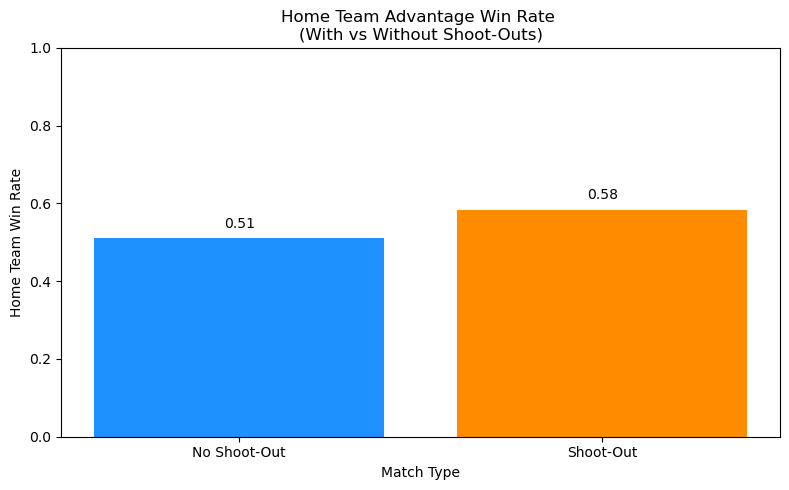

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('shoot_out_advantage.db')

# Read relevant data
df = pd.read_sql_query("""
    SELECT shoot_out, neutral_location, home_team_result
    FROM fifa_world_cup
""", conn)
conn.close()

# Filter only matches where home team advantage applies (not neutral)
df = df[df['neutral_location'] == 0]

# Convert home_team_result to binary: 1 for win, 0 for draw/lose
df['home_win'] = df['home_team_result'].str.lower().map(lambda x: 1 if x == 'win' else 0)

# Group by shoot_out and calculate win rate
grouped = df.groupby('shoot_out')['home_win'].mean().reset_index()
grouped['shoot_out'] = grouped['shoot_out'].map({0: 'No Shoot-Out', 1: 'Shoot-Out'})

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(grouped['shoot_out'], grouped['home_win'], color=['dodgerblue', 'darkorange'])
plt.title("Home Team Advantage Win Rate \n(With vs Without Shoot-Outs)")
plt.ylabel("Home Team Win Rate")
plt.xlabel("Match Type")
plt.ylim(0, 1)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [17]:
print("When analyzing the win rate of the home teams in matches involving shoot outs, we focused on non-neutral venues where home team advantage was applicable, revealing an interesting trend when comparing the match outcomes of shoot-out vs. non-shoot-out scenarios. Based on our analysis, we determined that home teams have a higher win rate in shoot-out matches (0.58) compared to non-shoot-out matches, where the win rate is slightly lower at 0.51. This results in a 7% increase in the home team's win rate when the match goes to a shoot-out (calculated as 0.58 - 0.51 = 0.07 or 7%).")
print("") 
print("This suggests that, contrary to traditional assumptions, the home advantage may actually be slightly enhanced in shoot-out situations. Possible factors contributing to this could include the psychological comfort and support of local fans, or familiarity with the pressure of high-stakes, high-pressure scenarios. Although the difference isn't huge, the data challenges the expectation that shoot-outs neutralize home-field advantages and instead indicates a subtle benefit to playing in front of a home crowd, even in penalty situations.")

When analyzing the win rate of the home teams in matches involving shoot outs, we focused on non-neutral venues where home team advantage was applicable, revealing an interesting trend when comparing the match outcomes of shoot-out vs. non-shoot-out scenarios. Based on our analysis, we determined that home teams have a higher win rate in shoot-out matches (0.58) compared to non-shoot-out matches, where the win rate is slightly lower at 0.51. This results in a 7% increase in the home team's win rate when the match goes to a shoot-out (calculated as 0.58 - 0.51 = 0.07 or 7%).

This suggests that, contrary to traditional assumptions, the home advantage may actually be slightly enhanced in shoot-out situations. Possible factors contributing to this could include the psychological comfort and support of local fans, or familiarity with the pressure of high-stakes, high-pressure scenarios. Although the difference isn't huge, the data challenges the expectation that shoot-outs neutralize home-